In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Loading data
file_path = Path("crypto_data.csv")
df_crypto = pd.read_csv(file_path)
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
df_crypto = df_crypto.drop(df_crypto[df_crypto.IsTrading==False].index)
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
df_crypto=df_crypto.dropna()
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
df_crypto = df_crypto.drop(df_crypto[df_crypto.TotalCoinsMined<0].index)
df_crypto

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
names_df=df_crypto
df_crypto = df_crypto.drop(columns=['Unnamed: 0','CoinName','IsTrading'])
df_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
4,SHA-256,PoW/PoS,0.000000e+00,0
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [7]:
df_crypto.dtypes
df_crypto['TotalCoinSupply']=df_crypto['TotalCoinSupply'].astype('float64')
df_crypto

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
2,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
4,SHA-256,PoW/PoS,0.000000e+00,0.000000e+00
5,X13,PoW/PoS,2.927942e+10,3.141593e+11
7,SHA-256,PoW,1.792718e+07,2.100000e+07
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2.000000e+09
1242,Scrypt,PoW/PoS,1.493105e+07,2.500000e+08
1245,CryptoNight,PoW,9.802226e+08,1.400223e+09
1246,Equihash,PoW,7.296538e+06,2.100000e+07


In [8]:
df_crypto.dtypes

Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply    float64
dtype: object

In [9]:
final_df=pd.get_dummies(df_crypto)
final_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
scaler = StandardScaler()
X= pd.DataFrame(scaler.fit_transform(final_df.values),columns=final_df.columns, index=final_df.index)

In [11]:
X

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.103123,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,1.382258,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
2,-0.076926,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,1.382258,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
4,-0.103123,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,1.382258,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
5,0.623791,-0.038177,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,1.382258,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
7,-0.102678,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,-0.723454,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,-0.053469,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,-0.723454,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
1242,-0.102752,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,1.382258,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
1245,-0.078787,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,-0.723454,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264
1246,-0.102942,-0.038266,-0.038264,-0.038264,-0.038264,-0.038264,-0.054153,-0.076696,-0.038264,-0.054153,...,-0.723454,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264,-0.038264


In [12]:
from sklearn.decomposition import PCA
# Initialize PCA model
pca = PCA(n_components=0.95)

crypto_pca = pca.fit_transform(X)

In [13]:
# Transform PCA data to a DataFrame
df_crypto_pca = pd.DataFrame(
    data=crypto_pca
)
df_crypto_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,88
0,-0.226763,-1.247056,-0.443753,-1.367902e-10,4.660279e-11,-5.757560e-08,3.475558e-10,0.001952,-1.113359,-0.290471,...,6.747802e-13,1.311920e-12,-5.117698e-13,9.671108e-14,-1.797447e-12,-3.453683e-12,-2.913601e-05,-0.620149,0.311330,0.183851
1,-0.212358,-1.245630,-0.444386,-1.367901e-10,4.660280e-11,-5.757561e-08,3.475557e-10,0.000574,-1.116438,-0.291084,...,6.740789e-13,1.311875e-12,-5.117845e-13,9.709970e-14,-1.797617e-12,-3.453440e-12,-2.913595e-05,-0.620130,0.311339,0.183798
2,-0.156176,-0.829299,-0.273513,-1.011320e-10,3.445446e-11,-4.256572e-08,2.569542e-10,-0.009525,-0.627418,-0.092659,...,9.997445e-15,1.224230e-14,-6.263478e-15,5.768203e-15,-1.217032e-15,-1.498048e-14,-2.198280e-09,0.181317,0.008839,0.204668
3,0.286000,-1.982529,-0.480747,-2.012354e-10,6.855786e-11,-8.469671e-08,5.112897e-10,-0.043232,-0.829931,-0.235206,...,3.073290e-14,3.942139e-14,1.167339e-14,4.521378e-14,-5.589993e-14,-2.959013e-14,-2.026460e-08,0.613297,0.394283,0.504696
4,-0.211787,1.470995,0.116681,8.028364e-11,-2.735172e-11,3.378895e-08,-2.039836e-10,-0.001314,0.063770,0.080055,...,9.772822e-15,1.125977e-14,-4.864768e-15,5.751093e-15,-2.680588e-15,-1.417231e-14,-2.251021e-09,0.233003,0.105195,0.104443


In [14]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.02084017, 0.01964148, 0.01877419, 0.01871896, 0.01871896,
       0.01871896, 0.01871896, 0.01868399, 0.01667483, 0.01598467,
       0.01499161, 0.01480669, 0.01457271, 0.01414731, 0.0131193 ,
       0.01165688, 0.01161312, 0.01117436, 0.01078495, 0.0101309 ,
       0.00961458, 0.00959601, 0.00952498, 0.00950633, 0.0094893 ,
       0.0094691 , 0.00943499, 0.0094141 , 0.00941097, 0.00940461,
       0.00940077, 0.00940077, 0.00940077, 0.00939986, 0.00939301,
       0.00939193, 0.00938697, 0.00938697, 0.00938697, 0.00938272,
       0.00937974, 0.00937827, 0.00937613, 0.00937351, 0.0093732 ,
       0.00937261, 0.0093722 , 0.00936936, 0.00936732, 0.0093658 ,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935948,
       0.00935948, 0.00935948, 0.00935948, 0.00935948, 0.00935

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(learning_rate=100)
transformed_features = tsne.fit_transform(crypto_pca)

In [16]:
X['x'] = transformed_features[:,0]
X['y'] = transformed_features[:,1]
# df2['class'] = df['target']

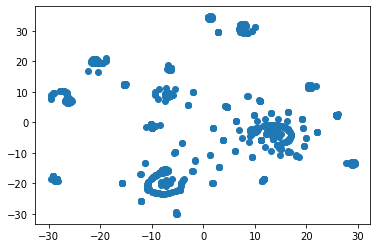

In [17]:
plt.scatter(X['x'], X['y'])
plt.show()

In [18]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

,k,inertia
0,1,421295.586495
1,2,273108.602412
2,3,176909.848360
3,4,132928.754965
4,5,119338.518925


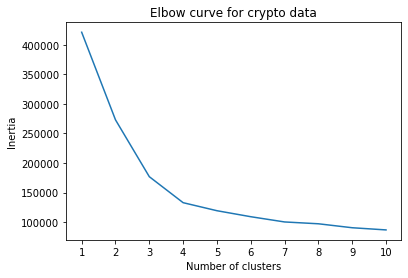

In [19]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

In [20]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [25]:
clusters = get_clusters(4, X)

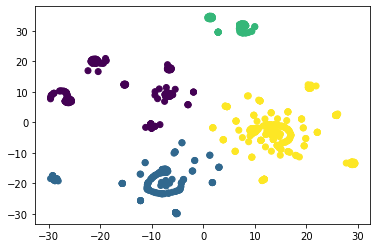

In [26]:
plt.scatter(X['x'], X['y'], c=X['class'])
plt.show()

In [51]:
clusters2 = get_clusters(7, X)

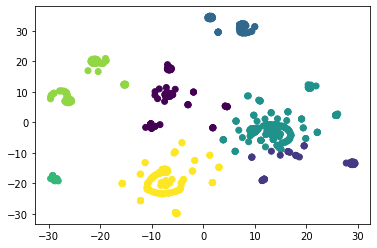

In [52]:
plt.scatter(X['x'], X['y'], c=X['class'])
plt.show()

Although the results aren't perfect, crypto currencies can be somewhat clustered based on how general you would be willing to go. I would suggest between 4 and 7 clusters based on the model.